In [255]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

ruta=r'ENTER YOUR PATH: WE HAVE CHOSEN THE LIKES FOLDER'
ruta2=r'ENTER YOUR PATH: WE HAVE CHOSEN THE CONTENT/STORIES FOLDER'

dataframe=[]
stories_timestamp=[]

def getlikes():
    with open(ruta) as jsonfile:
        data=json.load(jsonfile)
        for p in data['likes_media_likes']:
            #print('title: '+p['title'])
            data=p['title']
            dataframe.append(data)

    with open(ruta2) as jsonstories:
        datastories=json.load(jsonstories)
        for storie in datastories['ig_stories']:
            data2=storie['creation_timestamp']
            stories_timestamp.append(data2)



def likesdf():

    getlikes()
    timestamps=[]
    hours=[]
    
    for i in stories_timestamp:
        d=int(i)
        d=datetime.fromtimestamp(i).strftime('%Y-%m')
        h=datetime.fromtimestamp(i).strftime('%I %p')
        hours.append(h)
        timestamps.append(d)

    fig=plt.figure(constrained_layout=False,figsize=(40,40))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3,figure=fig,width_ratios=[1,1,1],  height_ratios=[1,1,1])

    ax1=fig.add_subplot(grid[0, :2])
    df=pd.DataFrame(dataframe,columns=['username'])
    df['count']=int(1)
    df=pd.pivot_table(df,index=['username'],aggfunc=sum)
    df=df.sort_values(by=['count'],ascending=False)
    df.head(10).plot.bar(ax=ax1)
    plt.title('Most liked users')

    ax2=fig.add_subplot(grid[1,:2])
    df2=pd.DataFrame(timestamps,columns=['Timestamps stories'])
    df2['count']=int(1)
    df2=pd.pivot_table(df2,index=['Timestamps stories'],aggfunc=sum)
    df2=df2.sort_values(by=['Timestamps stories'],ascending=False)
    df2.head(10).plot.bar(color='green',ax=ax2)
    plt.title('Posted stories by day')

    ax3=fig.add_subplot(grid[:,2])
    df3=pd.DataFrame(hours,columns=['hours stories'])
    df3['count']=int(1)
    df3=pd.pivot_table(df3,index=['hours stories'],aggfunc=sum)
    df3=df3.sort_values(by=['hours stories'],ascending=False)
    df3.head(10).plot.bar(color='orange',ax=ax3)
    plt.rcParams.update({'font.size': 22}) 
   
    grid.tight_layout(fig)
    plt.title('Posted stories by hour')

   

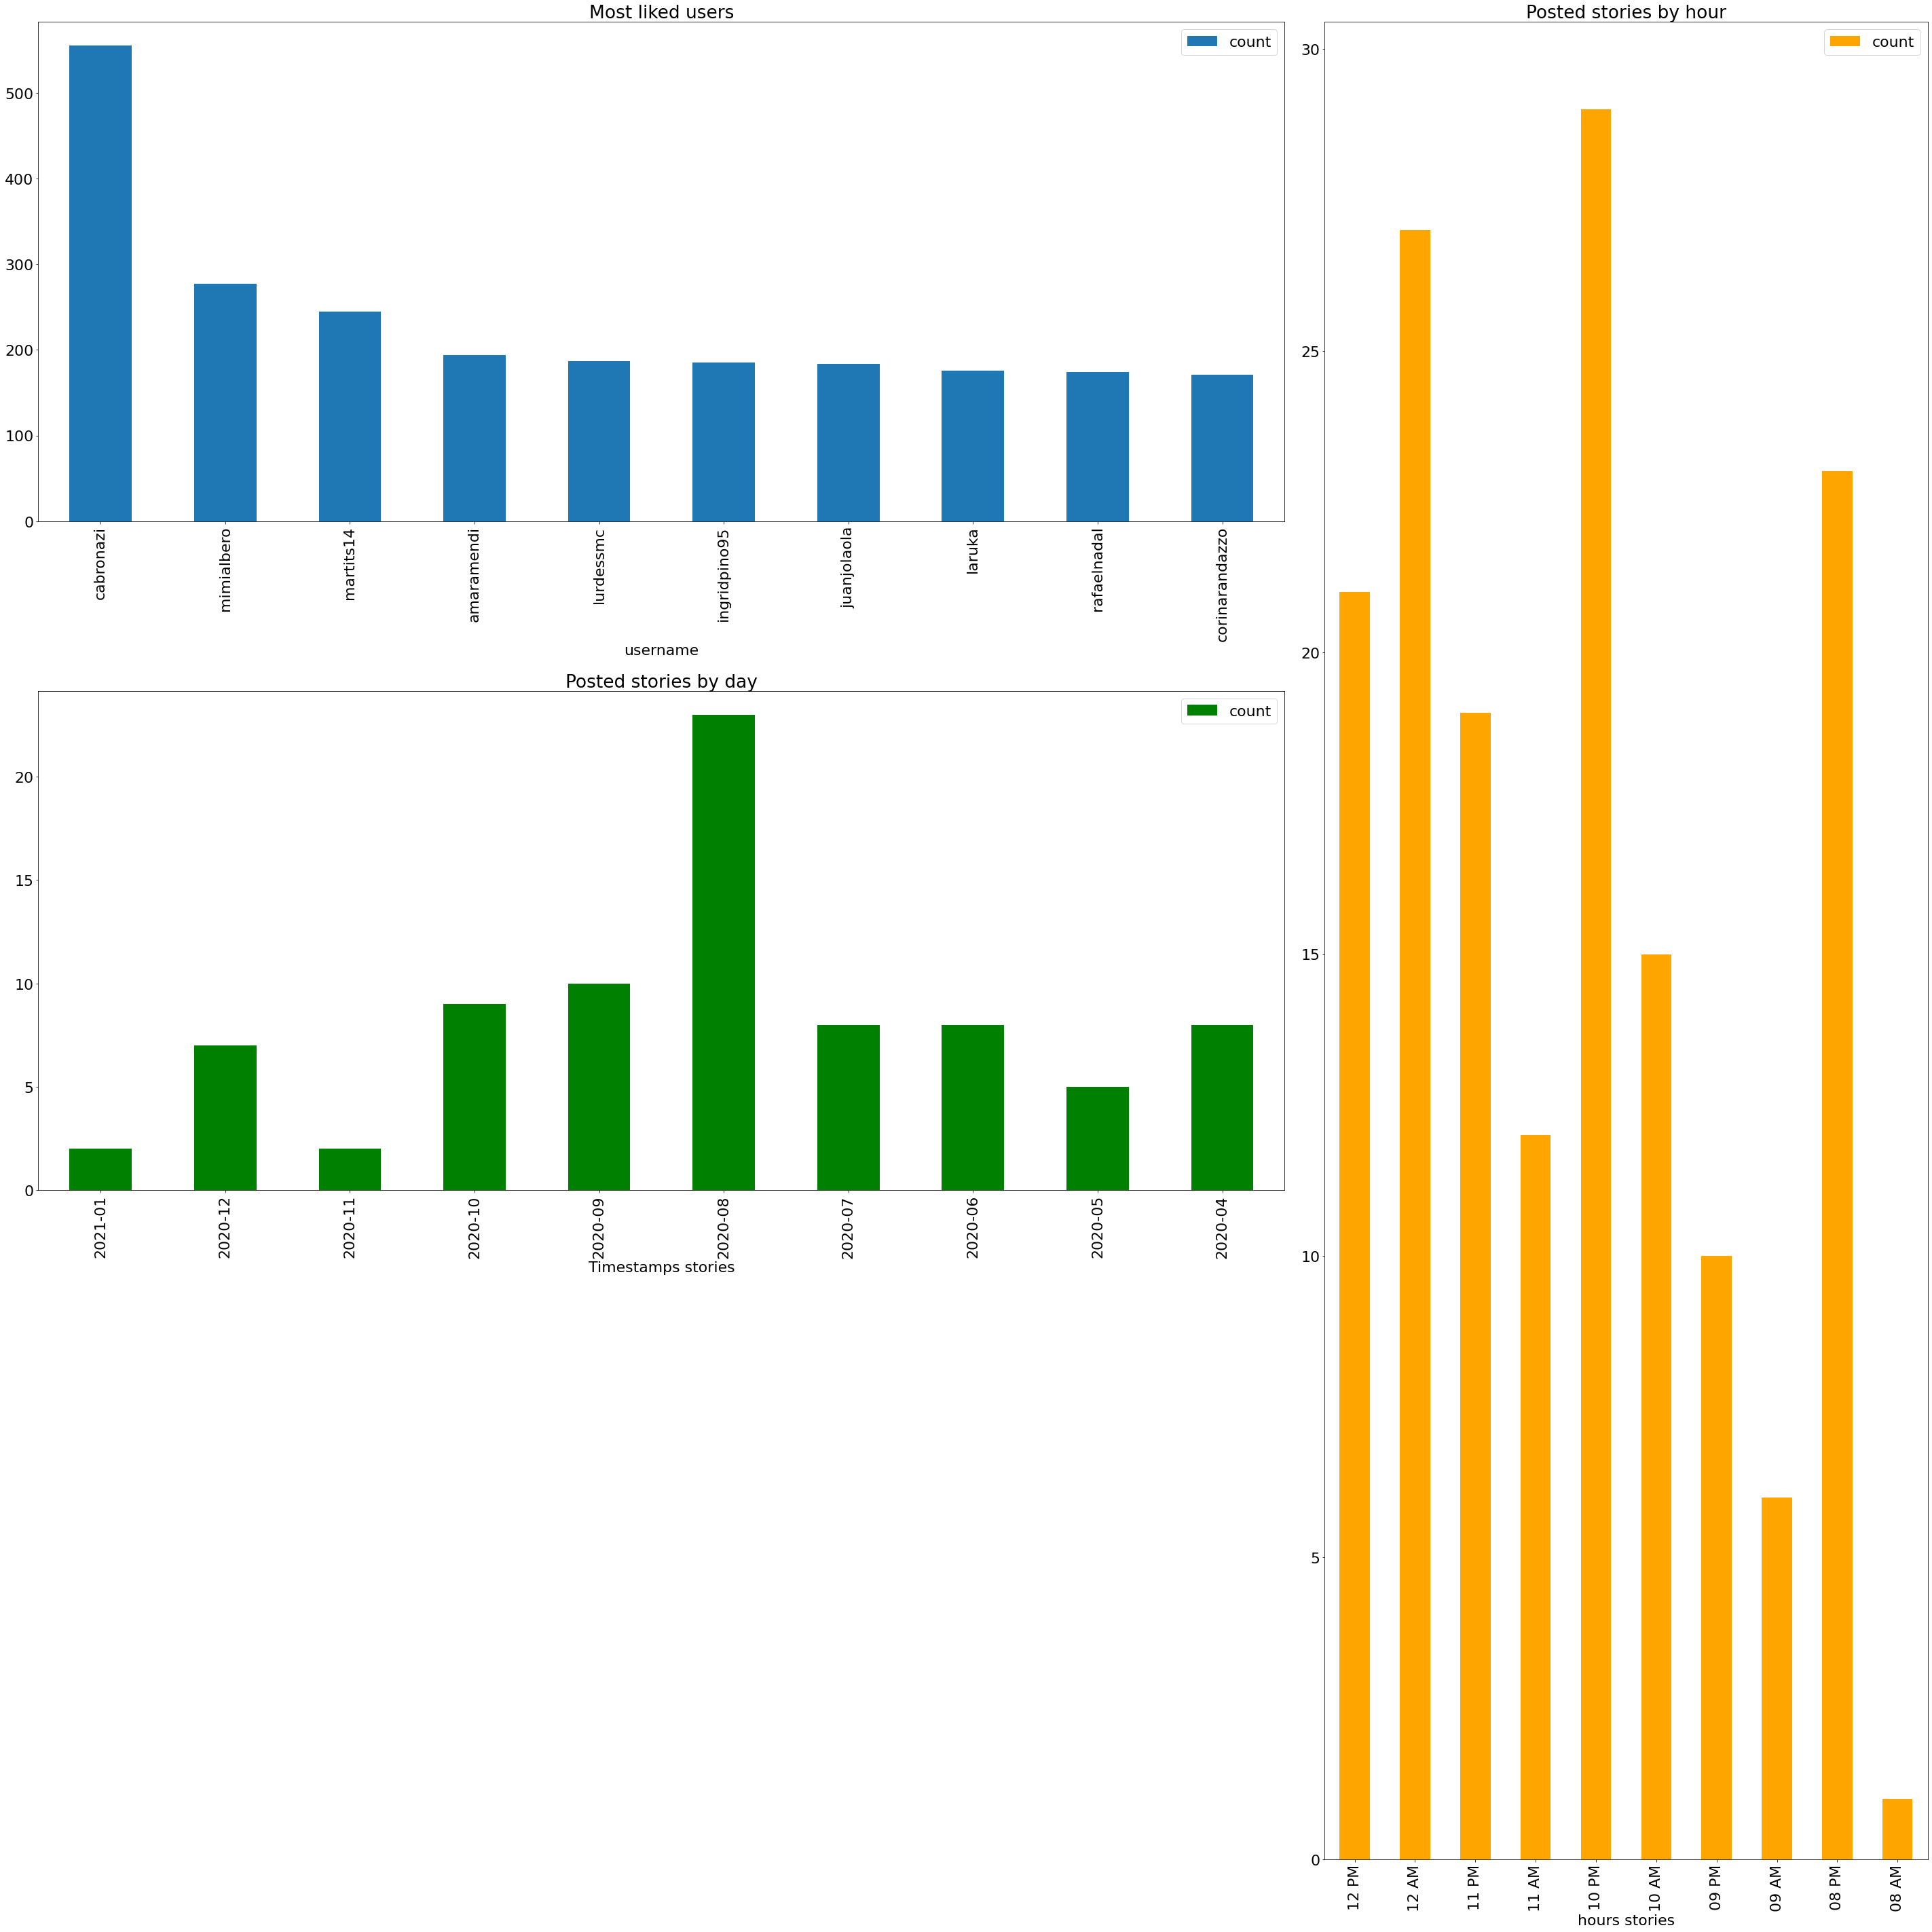

In [256]:
likesdf()